In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import os
for dirname, _, filenames in os.walk('C:/Users/Vijayan/Downloads'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


C:/Users/Vijayan/Downloads\01. Wireless Network.pdf
C:/Users/Vijayan/Downloads\02. Wireless Network.pdf
C:/Users/Vijayan/Downloads\03.Punitha Mam Comparitive Paper 3-6.1.24.docx
C:/Users/Vijayan/Downloads\126001966.pdf
C:/Users/Vijayan/Downloads\133.pdf
C:/Users/Vijayan/Downloads\2-Figure1-1.png
C:/Users/Vijayan/Downloads\2023-JFAR.pdf
C:/Users/Vijayan/Downloads\22+IJISAE_Ibs+Suha_11_1316 (1).pdf
C:/Users/Vijayan/Downloads\2344-Article Text-10530-1-10-20240213.pdf
C:/Users/Vijayan/Downloads\25859752 (1).pdf
C:/Users/Vijayan/Downloads\25859752.pdf
C:/Users/Vijayan/Downloads\3.Anupriya M.E.rar
C:/Users/Vijayan/Downloads\33659-Article Text-126582-1-10-20230926 (1).pdf
C:/Users/Vijayan/Downloads\33659-Article Text-126582-1-10-20230926.pdf
C:/Users/Vijayan/Downloads\37138-82988-1-PB.pdf
C:/Users/Vijayan/Downloads\4435 04 chapter 1.pdf
C:/Users/Vijayan/Downloads\a-photo-of-a-fashion-show-on-a-stage-with-a-male-a-0qCXq1VrQyiqR2ySSZZtTA-0AeoszuoQeGau6mgkHlrSA.jpeg
C:/Users/Vijayan/Downloads\AD

In [3]:
df = pd.read_csv('C:/Users/Vijayan/Downloads/Heart_Disease_Prediction.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [7]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [9]:
# Get the duplicate rows
duplicate_rows = df[df.duplicated()]

# Print the duplicate rows
print(duplicate_rows)

Empty DataFrame
Columns: [Age, Sex, Chest pain type, BP, Cholesterol, FBS over 120, EKG results, Max HR, Exercise angina, ST depression, Slope of ST, Number of vessels fluro, Thallium, Heart Disease]
Index: []


In [11]:
X=df.iloc[:, :-1]
X.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


In [13]:
 y= df.iloc[:, -1]
y.head()

0    Presence
1     Absence
2    Presence
3     Absence
4     Absence
Name: Heart Disease, dtype: object

In [15]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column
y_encoded = label_encoder.fit_transform(y)
# Print the encoded values
print(y_encoded)

# Print the type of the encoded array
print(type(y_encoded))  # Should be <class 'numpy.ndarray'>

# Print the dtype of the encoded array
print(y_encoded.dtype)  # Should be i

[1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1
 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1
 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1
 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1
 0 0 1 1 0 1 0 0 0 0 1]
<class 'numpy.ndarray'>
int32


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.25, random_state = 9)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [77]:
from sklearn.feature_selection import mutual_info_classif
information_gain = mutual_info_classif(X, y)

In [79]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Information Gain': information_gain
})


In [81]:
feature_importance = feature_importance.sort_values(by='Information Gain', ascending=False)

print("Information Gain for each feature:\n", feature_importance)

Information Gain for each feature:
                     Feature  Information Gain
12                 Thallium          0.131046
9             ST depression          0.122187
10              Slope of ST          0.091957
2           Chest pain type          0.087347
11  Number of vessels fluro          0.075251
4               Cholesterol          0.068989
7                    Max HR          0.065464
1                       Sex          0.056254
8           Exercise angina          0.050213
6               EKG results          0.036013
3                        BP          0.018889
0                       Age          0.016134
5              FBS over 120          0.000000


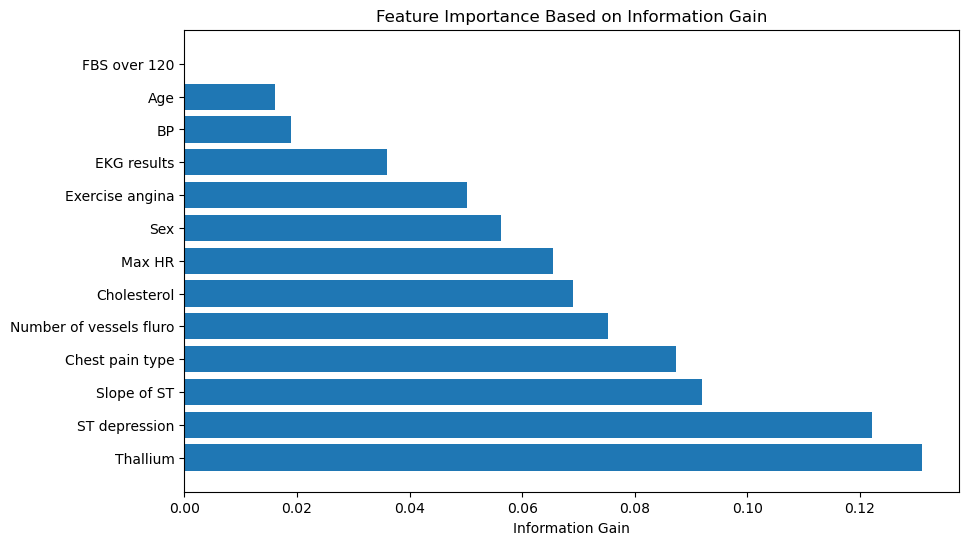

In [83]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Information Gain'])
plt.xlabel('Information Gain')
plt.title('Feature Importance Based on Information Gain')
plt.show()

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [49]:
model = Sequential()

In [55]:
LSTM = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', kernel_initializer='he_normal', input_shape=(X_train.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(units=64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(units=32, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(units=16, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(units=8, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

C:\Users\Vijayan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
LSTM.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [59]:
print(type(y_train))  # Check if it's a numpy array
print(y_train.dtype) 

<class 'numpy.ndarray'>
int32


In [63]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',       # The metric to monitor
    patience=10,              # Number of epochs with no improvement to wait before stopping
    restore_best_weights=True # Restore the model weights from the epoch with the best value of the monitored metric
)

In [65]:
history=LSTM.fit(X_train, y_train, batch_size = 40, epochs = 200, validation_split=0.2,  # Reserve 20% of training data for validation
    callbacks=[early_stopping])

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - accuracy: 0.5038 - loss: 0.9828 - val_accuracy: 0.5122 - val_loss: 0.9547
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5049 - loss: 1.0773 - val_accuracy: 0.5122 - val_loss: 0.9061
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5316 - loss: 0.9628 - val_accuracy: 0.5122 - val_loss: 0.8509
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5533 - loss: 0.9402 - val_accuracy: 0.4878 - val_loss: 0.7963
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4775 - loss: 1.1553 - val_accuracy: 0.4878 - val_loss: 0.7429
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5523 - loss: 1.0268 - val_accuracy: 0.4878 - val_loss: 0.7043
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4611 - loss: 1.0944 - val_accuracy: 0.5366 - val_loss: 0.6815
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5256 - loss: 0.9379 - val_accuracy: 0.5854 - val_loss

In [67]:
# Extract loss values from the history
loss = history.history['loss']

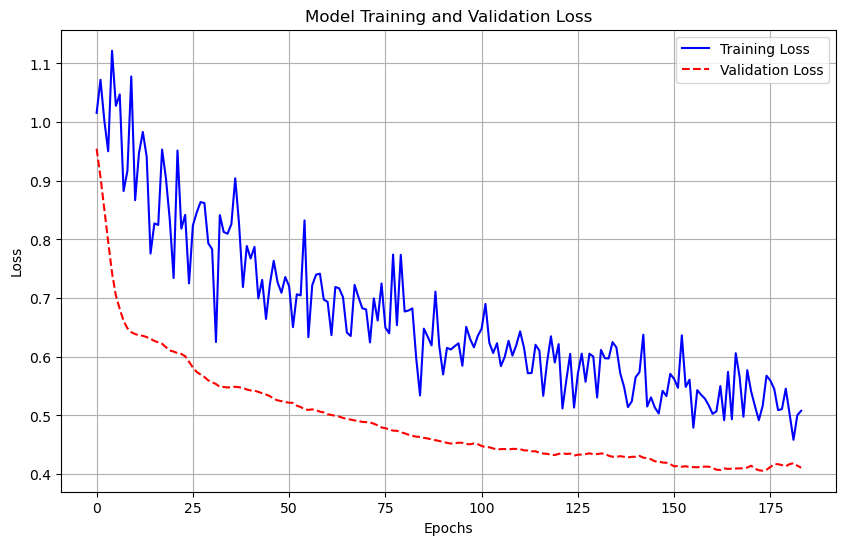

In [69]:
import matplotlib.pyplot as plt

# Extract loss values from the history
loss = history.history['loss']
val_loss = history.history['val_loss']  # Validation loss for early stopping

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red', linestyle='--')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]]


In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

[[41  2]
 [ 8 17]]
Accuracy: 85.29%
